In [1]:
import time
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 3)
np.set_printoptions(precision=3)
%matplotlib inline

https://www.google.com/search?client=safari&rls=en&q=yeo+johnson+transformation&ie=UTF-8&oe=UTF-8

In [2]:
from math import *
from sklearn.metrics import *

import statsmodels.api as sm
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [3]:
import pylab 
import joblib
import scipy.stats as stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

## Loading the dataset ...

In [4]:
df_wid = pd.read_csv('Unbinned_final.csv')
df_wid.drop(['Unnamed: 0','ColTime'],axis=1,inplace=True)

### Dataset Information

- Response variable is **Acceleration**
- Independent variables data definition are as follows
- id : vehicle id
- subjtype - 1 (tw), 2 car
- strict leader type: 1 tw, 2 car, 3+ other
- Sideleader type: 1 tw, 2 car, 3+ other
- log acc is log of **acceleration** 
- log abs speed is log of speed of subj vehicle
- log S is log of spacing between leader and follower
- log deltav is log of speed difference between follower and leader

In [5]:
df_wid.head()

,Acc,AbsSpd,S,DeltaV,Type-Car,Type-TW,SLType-Car,SLType-TW,Category-Left,Category-NoLead,Category-Right,AccGapWiden-Widening
0,0.754,12.549,11.503,0.092,0,1,0,1,0,1,0,1
1,2.657,11.684,6.135,4.808,0,1,0,1,0,1,0,1
2,1.669,12.311,8.152,0.389,0,1,0,1,0,1,0,1
3,1.258,12.986,12.444,2.004,0,1,0,1,0,1,0,1
4,1.427,12.165,5.068,1.973,0,1,0,1,0,1,0,1


## Model building

In [6]:
# Best random state 50

In [7]:
X = df_wid.drop(['Acc'],axis=1)
y = df_wid['Acc']

attributes = X.columns
#scaler = RobustScaler()
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = attributes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=65)

xgbr = XGBRegressor(colsample_bytree = 0.8,learning_rate =0.2,max_depth =15,
        min_child_weight = 18,n_estimators = 50,subsample = 0.84)

xgbr.fit(X_train,y_train,early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=False)


svr = SVR(kernel='linear')
svr.fit(X_train,y_train)

rf = RandomForestRegressor(random_state=10,n_estimators = 100,
                          max_depth=15, min_samples_leaf=20,min_samples_split=20)
rf.fit(X_train,y_train)

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [8]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 15,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 20,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [9]:
xgbr.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.8,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.2,
 'max_delta_step': 0,
 'max_depth': 15,
 'min_child_weight': 18,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 50,
 'n_jobs': 4,
 'num_parallel_tree': 1,
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.84,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

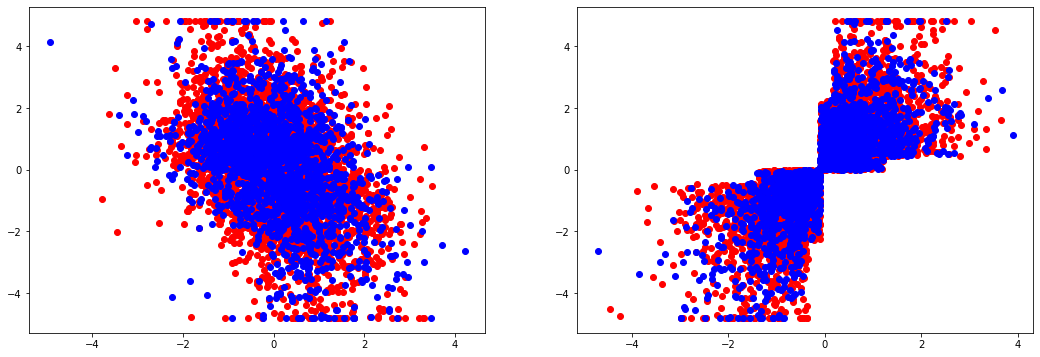

In [10]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.scatter(X_train['AbsSpd'],y_train,c='r')
plt.scatter(X_test['AbsSpd'],y_test,c='b')

plt.subplot(1,2,2)
plt.scatter(X_train['DeltaV'],y_train,c='r')
plt.scatter(X_test['DeltaV'],y_test,c='b')
plt.show()

## Saving the unbinned models

In [11]:
joblib.dump(lr, 'lr_unbin_com.pkl')
joblib.dump(svr, 'svr_unbin_com.pkl')
joblib.dump(rf, 'rf_unbin_com.pkl')
joblib.dump(xgbr, 'xgbr_unbin_com.pkl')

['xgbr_unbin_com.pkl']

In [12]:
xgbr_pred   = xgbr.predict(X_test)
rf_pred     = rf.predict(X_test)
svr_pred    = svr.predict(X_test)
lr_pred     = lr.predict(X_test)

xgbr_train  = xgbr.predict(X_train)
rf_train    = rf.predict(X_train)
svr_train   = svr.predict(X_train)
lr_train    = lr.predict(X_train)


xgbr_R2_T   = xgbr.score(X_train,y_train)
xgbr_R2     = xgbr.score(X_test,y_test)
xgbr_RMSE   = mean_squared_error(y_test,xgbr_pred,squared=False)
xgbr_RMSE_T =mean_squared_error(y_train,xgbr_train,squared=False)
xgbr_MAE    = mean_absolute_error(y_test,xgbr_pred)
xgbr_MAE_T  = mean_absolute_error(y_train,xgbr_train)


rf_R2_T     = rf.score(X_train,y_train)
rf_R2       = rf.score(X_test,y_test)
rf_RMSE     = mean_squared_error(y_test,rf_pred,squared=False)
rf_RMSE_T   = mean_squared_error(y_train,rf_train,squared=False)
rf_MAE      = mean_absolute_error(y_test,rf_pred)
rf_MAE_T    = mean_absolute_error(y_train,rf_train)

svr_R2_T    = svr.score(X_train,y_train)
svr_R2      = svr.score(X_test,y_test)
svr_RMSE    = mean_squared_error(y_test,svr_pred,squared=False)
svr_RMSE_T  = mean_squared_error(y_train,svr_train,squared=False)
svr_MAE     = mean_absolute_error(y_test,svr_pred)
svr_MAE_T   = mean_absolute_error(y_train,svr_train)

lr_R2_T     = lr.score(X_train,y_train)
lr_R2       = lr.score(X_test,y_test)
lr_RMSE     = mean_squared_error(y_test,lr_pred,squared=False)
lr_RMSE_T   = mean_squared_error(y_train,lr_train,squared=False)
lr_MAE      = mean_absolute_error(y_test,lr_pred)
lr_MAE_T    = mean_absolute_error(y_train,lr_train)



dct = {}
dct['XGBR'] = [xgbr_R2_T,xgbr_R2,xgbr_RMSE_T,xgbr_RMSE,xgbr_MAE_T,xgbr_MAE]
dct['RF']   = [rf_R2_T,rf_R2,rf_RMSE_T,rf_RMSE,rf_MAE_T,rf_MAE]
dct['SVR']  = [svr_R2_T,svr_R2,svr_RMSE_T,svr_RMSE,svr_MAE_T,svr_MAE]
dct['LR']   = [lr_R2_T,lr_R2,lr_RMSE_T,lr_RMSE,lr_MAE_T,lr_MAE]

df_res = pd.DataFrame(dct).T
df_res.columns = ['Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE']

dct1 = {}
dct1['XGBR'] = list(xgbr.feature_importances_)
dct1['RF']   = list(rf.feature_importances_)
dct1['SVR']  = list(svr.coef_[0])
dct1['LR']   = list(lr.coef_)

df_fi = pd.DataFrame(dct1).T
df_fi.columns = X.columns
df_res

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
XGBR,0.794,0.656,0.765,1.004,0.579,0.758
RF,0.723,0.680,0.886,0.969,0.684,0.749
SVR,0.646,0.655,1.001,1.007,0.739,0.739
LR,0.664,0.676,0.975,0.976,0.758,0.755


In [13]:
df_fi.T

,XGBR,RF,SVR,LR
AbsSpd,0.004,3.205e-02,-0.095,-0.124
S,0.003,2.732e-02,0.020,0.025
DeltaV,0.024,6.371e-01,0.433,0.526
Type-Car,0.003,5.727e-04,0.038,0.059
Type-TW,0.003,9.696e-04,0.065,0.091
SLType-Car,0.003,9.761e-04,0.029,0.014
SLType-TW,0.003,2.074e-03,-0.054,-0.074
Category-Left,0.003,8.017e-04,-0.024,0.016
Category-NoLead,0.003,2.101e-03,-0.048,0.020
Category-Right,0.003,8.350e-04,-0.015,0.018


In [14]:
df_wid1 = df_wid.copy()
# df_wid1['DeltaV'] = scaler.fit_transform(np.array(df_wid1['DeltaV']).reshape(-1,1))
# df_wid1['S']      = scaler.fit_transform(np.array(df_wid1['S']).reshape(-1,1))
# df_wid1['AbsSpd'] = scaler.fit_transform(np.array(df_wid1['AbsSpd']).reshape(-1,1))

sm_X = df_wid1.drop(['Acc'],axis=1)
sm_y = df_wid1['Acc']

attributes = sm_X.columns
scaler = StandardScaler()
sm_X = pd.DataFrame(scaler.fit_transform(sm_X))
sm_X.columns = attributes

model = sm.OLS(sm_y, sm_X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    Acc   R-squared (uncentered):                   0.665
Model:                            OLS   Adj. R-squared (uncentered):              0.665
Method:                 Least Squares   F-statistic:                              1124.
Date:                Tue, 03 Aug 2021   Prob (F-statistic):                        0.00
Time:                        21:09:02   Log-Likelihood:                         -8727.1
No. Observations:                6233   AIC:                                  1.748e+04
Df Residuals:                    6222   BIC:                                  1.755e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

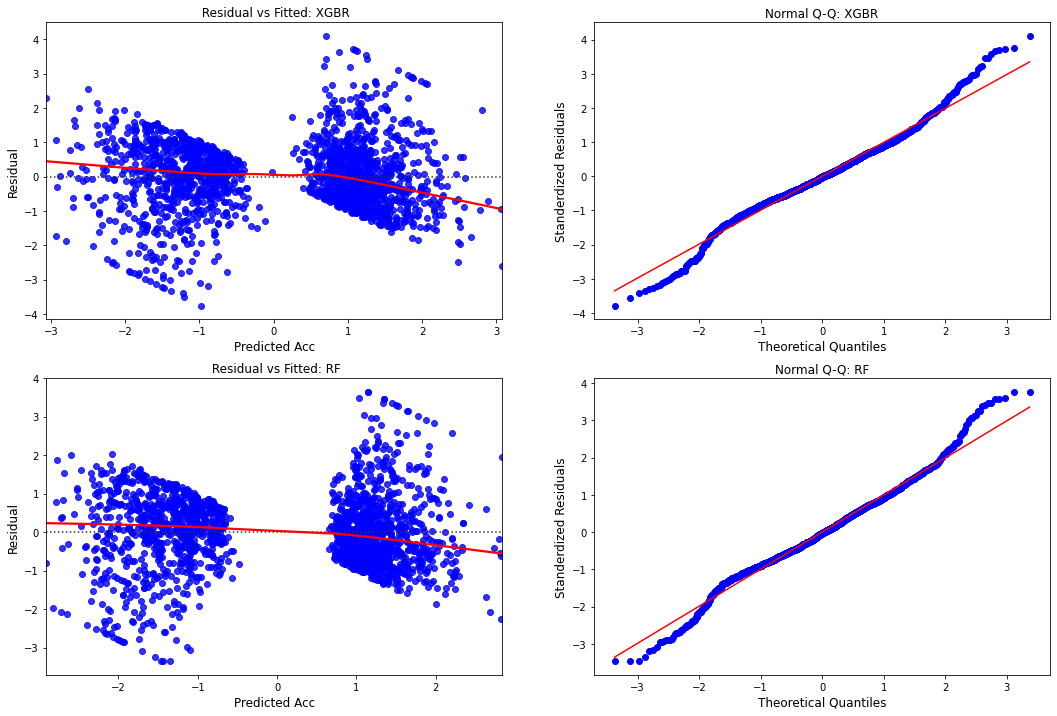

In [15]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
xgbr_res = np.array((y_test-xgbr_pred))
sns.residplot(xgbr_pred,xgbr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: XGBR")

plt.subplot(2,2,2)
xgbr_stan = (xgbr_res - np.mean(xgbr_res))/np.std(xgbr_res)
stats.probplot(xgbr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: XGBR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)


plt.subplot(2,2,3)
rf_res = np.array((y_test-rf_pred))
sns.residplot(rf_pred,rf_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: RF")

plt.subplot(2,2,4)
rf_stan = (rf_res - np.mean(rf_res))/np.std(rf_res)
stats.probplot(rf_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: RF")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)

plt.show()

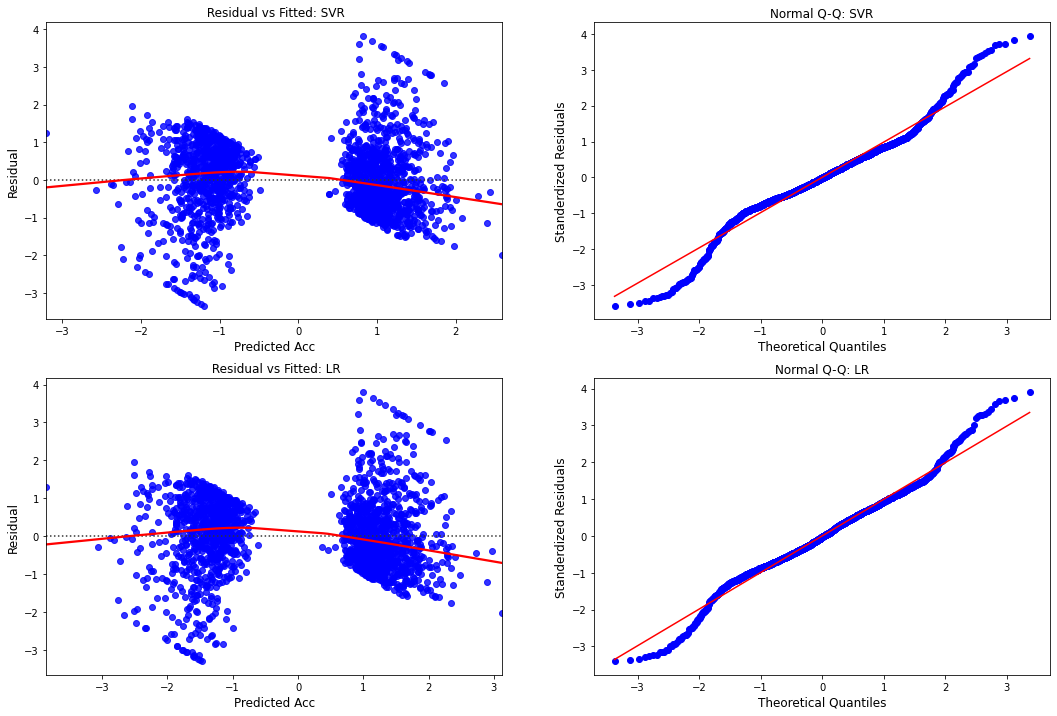

In [16]:
plt.figure(figsize=(18,12))

plt.subplot(2,2,1)
svr_res = np.array((y_test-svr_pred))
sns.residplot(svr_pred,svr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: SVR")

plt.subplot(2,2,2)
svr_stan = (svr_res - np.mean(svr_res))/np.std(svr_res)
stats.probplot(svr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: SVR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)


plt.subplot(2,2,3)
lr_res = np.array((y_test-lr_pred))
sns.residplot(lr_pred,lr_res,lowess = True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.ylabel("Residual",size=12)
plt.xlabel("Predicted Acc",size=12)
plt.title(" Residual vs Fitted: LR")

plt.subplot(2,2,4)
lr_stan = (lr_res - np.mean(lr_res))/np.std(lr_res)
stats.probplot(lr_stan, dist="norm", plot=pylab)
plt.title("Normal Q-Q: LR")
plt.ylabel("Standerdized Residuals",size=12)
plt.xlabel("Theoretical Quantiles",size=12)

plt.show()

## Loading the Binned models

In [17]:
xgbr = joblib.load('xgbr_bin_com.pkl')
rf   = joblib.load('rf_bin_com.pkl')
svr  = joblib.load('svr_bin_com.pkl')
lr   = joblib.load('lr_bin_com.pkl')

xgbr_pred   = xgbr.predict(X_test)
rf_pred     = rf.predict(X_test)
svr_pred    = svr.predict(X_test)
lr_pred     = lr.predict(X_test)

xgbr_train  = xgbr.predict(X_train)
rf_train    = rf.predict(X_train)
svr_train   = svr.predict(X_train)
lr_train    = lr.predict(X_train)


xgbr_R2_T   = xgbr.score(X_train,y_train)
xgbr_R2     = xgbr.score(X_test,y_test)
xgbr_RMSE   = mean_squared_error(y_test,xgbr_pred,squared=False)
xgbr_RMSE_T =mean_squared_error(y_train,xgbr_train,squared=False)
xgbr_MAE    = mean_absolute_error(y_test,xgbr_pred)
xgbr_MAE_T  = mean_absolute_error(y_train,xgbr_train)


rf_R2_T     = rf.score(X_train,y_train)
rf_R2       = rf.score(X_test,y_test)
rf_RMSE     = mean_squared_error(y_test,rf_pred,squared=False)
rf_RMSE_T   = mean_squared_error(y_train,rf_train,squared=False)
rf_MAE      = mean_absolute_error(y_test,rf_pred)
rf_MAE_T    = mean_absolute_error(y_train,rf_train)

svr_R2_T    = svr.score(X_train,y_train)
svr_R2      = svr.score(X_test,y_test)
svr_RMSE    = mean_squared_error(y_test,svr_pred,squared=False)
svr_RMSE_T  = mean_squared_error(y_train,svr_train,squared=False)
svr_MAE     = mean_absolute_error(y_test,svr_pred)
svr_MAE_T   = mean_absolute_error(y_train,svr_train)

lr_R2_T     = lr.score(X_train,y_train)
lr_R2       = lr.score(X_test,y_test)
lr_RMSE     = mean_squared_error(y_test,lr_pred,squared=False)
lr_RMSE_T   = mean_squared_error(y_train,lr_train,squared=False)
lr_MAE      = mean_absolute_error(y_test,lr_pred)
lr_MAE_T    = mean_absolute_error(y_train,lr_train)


dct = {}
dct['XGBR'] = [xgbr_R2_T,xgbr_R2,xgbr_RMSE_T,xgbr_RMSE,xgbr_MAE_T,xgbr_MAE]
dct['RF']   = [rf_R2_T,rf_R2,rf_RMSE_T,rf_RMSE,rf_MAE_T,rf_MAE]
dct['SVR']  = [svr_R2_T,svr_R2,svr_RMSE_T,svr_RMSE,svr_MAE_T,svr_MAE]
dct['LR']   = [lr_R2_T,lr_R2,lr_RMSE_T,lr_RMSE,lr_MAE_T,lr_MAE]

df_res = pd.DataFrame(dct).T
df_res.columns = ['Train_R2','Test_R2','Train_RMSE','Test_RMSE','Train_MAE','Test_MAE']
df_res

,Train_R2,Test_R2,Train_RMSE,Test_RMSE,Train_MAE,Test_MAE
XGBR,0.597,0.610,1.069,1.070,0.785,0.777
RF,0.631,0.644,1.022,1.022,0.766,0.763
SVR,0.615,0.631,1.045,1.041,0.783,0.771
LR,0.583,0.594,1.087,1.092,0.821,0.816
